In [1]:
import warnings
warnings.filterwarnings('ignore')

import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
print('NetworkX version: {}'.format(nx.__version__))

NetworkX version: 2.4


In [2]:
import pandas as pd

### 1. Versuch

In [3]:
file = open("Dataframe_bereinigt_parteiuebergreifend.csv", mode="r")
df=pd.read_csv(file)
df.set_index("Unnamed: 0").head(5)

,Datum,Geschäft,Einreichender 1,Partei 1,Einreichender 2,Partei 2,Departement
Unnamed: 0,,,,,,,
0,25.11.2009,2009/562,Kurt Hüssy,SVP,Peter Anderegg,EVP,Polizeidepartement (PD)
1,21.8.2002,2002/289,Markus Schwyn,PFZ,Monika Erfigen,SVP,Hochbaudepartement (HBD)
2,3.5.2006,2006/134,Richard Rabelbauer,EVP,Robert Schönbächler,CVP,Departement der Industriellen Betriebe (DIB)
3,26.05.2010,2008/16,Rebekka Wyler,SP,Pierino Cerliani,Grüne,NaN
4,30.8.2000,2000/415,Markus Schwyn,PFZ,Mauro Tuena,SVP,Sozialdepartement (SD)


In [4]:
Netz = nx.Graph()

In [5]:
len(df)

958

In [6]:
for a in range(0,(len(df)-1)):
    Punkt1 = str(df.loc[a]["Einreichender 1"] + ", " + df.loc[a]["Partei 1"])
    Punkt2 = str(df.loc[a]["Einreichender 2"] + ", " + df.loc[a]["Partei 2"])
    Netz.add_edge(Punkt1, Punkt2)

In [7]:
Netz

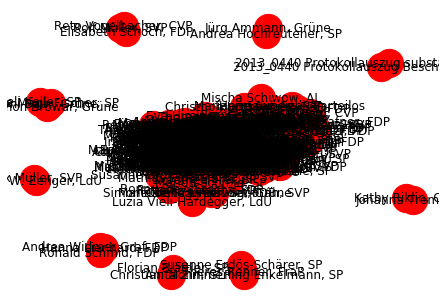

In [8]:
nx.draw(Netz, node_size=800, node_color='red', with_labels=True)

In [9]:
nx.write_gexf(Netz, "Politikerpaare.gexf")

### Auswertungen

In [10]:
from operator import itemgetter

#Knoten die mehrere Personen verbinden, oder oft dazwischen liegen haben eine hohe Betweenness.
bet = nx.betweenness_centrality(Netz)
sorted(bet.items(), key=itemgetter(1), reverse=True)

[('Ernst Danner, EVP', 0.1265690978199915),
 ('Robert Schönbächler, CVP', 0.10760665151189089),
 ('Markus Schwyn, PFZ', 0.10402213803642062),
 ('Markus Knauss, Grüne', 0.08159543790414375),
 ('Susi Gut, PFZ', 0.08033354017306266),
 ('Mario Mariani, CVP', 0.06679175201395808),
 ('Monjek Rosenheim, FDP', 0.05500604750069403),
 ('Ueli Nagel, Grüne', 0.05378565264550255),
 ('Bernhard Piller, Grüne', 0.04762271963924746),
 ('Jean-Daniel Strub, SP', 0.04562566217421133),
 ('Christian Traber, CVP', 0.044430388121160916),
 ('Daniel Leupi, Grüne', 0.04214028227360588),
 ('Matthias Probst, Grüne', 0.04093460890096227),
 ('Walter Angst, AL', 0.04043926037429228),
 ('Balz Bürgisser, Grüne', 0.040320541810816485),
 ('Niklaus Scherr, AL', 0.039377239697613316),
 ('Albert Leiser, FDP', 0.03501454240256606),
 ('Marco Denoth, SP', 0.033850422736983195),
 ('Christine Seidler, SP', 0.03340686499510005),
 ('Roger Tognella, FDP', 0.033265450677986814),
 ('Isabel Garcia, GLP', 0.03299787908477723),
 ('Balth

In [11]:
#gewichtete Zentralität – basierend auf der Idee, dass Knoten mit hohen Gewichten auch viel zur Zentrelität beitragen
eig = nx.eigenvector_centrality(Netz)
sorted(eig.items(), key=itemgetter(1), reverse=True)

[('Robert Schönbächler, CVP', 0.3350954205329293),
 ('Ernst Danner, EVP', 0.3342688143207178),
 ('Daniel Leupi, Grüne', 0.2494316354003422),
 ('Albert Leiser, FDP', 0.22090687078801222),
 ('Bernhard Piller, Grüne', 0.19601312067220325),
 ('Mario Mariani, CVP', 0.18454521801548807),
 ('Niklaus Scherr, AL', 0.17233189140657024),
 ('Walter Angst, AL', 0.16964666380557597),
 ('Balthasar Glättli, Grüne', 0.1690069617018739),
 ('Pierino Cerliani, Grüne', 0.1508001879408423),
 ('Markus Knauss, Grüne', 0.14999860069097454),
 ('Gregor Bucher, Grüne', 0.14787469233570774),
 ('Claudia Nielsen, SP', 0.13713112406705155),
 ('Urs Rechsteiner, CVP', 0.1352703173110266),
 ('Beatrice Reimann, SP', 0.13458317087780014),
 ('Corine Mauch, SP', 0.12740479745320338),
 ('Gerold Lauber, CVP', 0.12180496468200147),
 ('Alexander Jäger, FDP', 0.12037274334909348),
 ('Richard Rabelbauer, EVP', 0.11043933562647572),
 ('Daniel Meier, CVP', 0.1092875140519709),
 ('Marlène Butz, SP', 0.0999536555155902),
 ('Jean-Clau

In [12]:
import pandas as pd
import seaborn as sns  #Seaborn ist Visualisierungspaket für Pandas

centrality_measures = {
    'degree': degc,
    'betweenness': bet,
    'closeness': clos,
    'eigenvector': eig,
}
centrality = pd.DataFrame(centrality_measures)
centrality.sort_values(by="eigenvector", ascending=False).head(10)

NameError: name 'degc' is not defined

In [ ]:
sns.pairplot(centrality)

### 2. Etwas raffinierterer Anlauf
Jetzt wollen wir...
- die nodes mit einer Partei versehen
- die edges mit einem Datum und einem Departement

In [14]:
#dazu brauchen datetime:
from datetime import datetime

In [15]:
file = open("Dataframe_bereinigt_parteiuebergreifend.csv", mode="r")
df2=pd.read_csv(file)
df2 = df2.set_index("Unnamed: 0")

In [16]:
#WIr beschränken uns, das Jahr hier rauszuholen, weil es in der Datumszeile Fehle hat:
df2["Jahr"] = df2["Geschäft"]
df2["Jahr"] = df2["Jahr"].apply(lambda x: x.split("/")[0])
df2["Jahr"]= pd.to_datetime(df2["Jahr"], format="%Y")
df2

,Datum,Geschäft,Einreichender 1,Partei 1,Einreichender 2,Partei 2,Departement,Jahr
Unnamed: 0,,,,,,,,
0,25.11.2009,2009/562,Kurt Hüssy,SVP,Peter Anderegg,EVP,Polizeidepartement (PD),2009-01-01
1,21.8.2002,2002/289,Markus Schwyn,PFZ,Monika Erfigen,SVP,Hochbaudepartement (HBD),2002-01-01
2,3.5.2006,2006/134,Richard Rabelbauer,EVP,Robert Schönbächler,CVP,Departement der Industriellen Betriebe (DIB),2006-01-01
3,26.05.2010,2008/16,Rebekka Wyler,SP,Pierino Cerliani,Grüne,NaN,2008-01-01
4,30.8.2000,2000/415,Markus Schwyn,PFZ,Mauro Tuena,SVP,Sozialdepartement (SD),2000-01-01
...,...,...,...,...,...,...,...,...
953,9.1.2008,2008/3,Joe A. Manser,SP,Mario Mariani,CVP,Präsidialdepartement (PRD),2008-01-01
954,9.7.1997,1997/284,Silvio Scotoni,FDP,Peter Marti,FDP,Polizeidepartement (PD),1997-01-01
955,7.4.2004,2004/202,Alecs Recher,AL,Muriel Herzig,Grüne,Sozialdepartement (SD),2004-01-01


In [17]:
#Als erstes ziehen wir die Personen as knodes raus und verleiehen ihnen das Attribut "Partei"

Netz2 = nx.Graph()
for a in range(0,(len(df2)-1)):
    Person1 = str(df2.loc[a]["Einreichender 1"])
    Person2 = str(df2.loc[a]["Einreichender 2"])
    Partei1 = str(df2.loc[a]["Partei 1"])
    Partei2 = str(df2.loc[a]["Partei 2"])
    Netz2.add_node(Person1, Partei = Partei1)
    Netz2.add_node(Person2, Partei = Partei2)

In [18]:
#Test:
print(list(Netz2.nodes(data='Partei')))

[('Kurt Hüssy', 'SVP'), ('Peter Anderegg', 'EVP'), ('Markus Schwyn', 'PFZ'), ('Monika Erfigen', 'SVP'), ('Richard Rabelbauer', 'EVP'), ('Robert Schönbächler', 'CVP'), ('Rebekka Wyler', 'SP'), ('Pierino Cerliani', 'Grüne'), ('Mauro Tuena', 'SVP'), ('Mario Mariani', 'CVP'), ('Muriel Herzig', 'Grüne'), ('Susi Gut', 'PFZ'), ('Roger Liebi', 'SVP'), ('Ezgi Akyol', 'AL'), ('Anjushka Früh', 'SP'), ('Ernst Danner', 'EVP'), ('Raphael Kobler', 'FDP'), ('Corine Mauch', 'SP'), ('Albert Leiser', 'FDP'), ('Matthias Probst', 'Grüne'), ('Guido Hüni', 'GLP'), ('Köbi Möri', 'Parteilos'), ('Hansruedi Bär', 'SVP'), ('Cäcilia Hänni-Etter', 'FDP'), ('Markus Hungerbühler', 'CVP'), ('Katrin Schönenberger-Meier', 'EVP'), ('Thomas  Kappeler', 'CVP'), ('Alan David Sangines', 'SP'), ('Daniel Leupi', 'Grüne'), ('Christian Traber', 'CVP'), ('Balz Bürgisser', 'Grüne'), ('Rosa Maino', 'AL'), ('Cornelia Schaub', 'SVP'), ('Alecs Recher', 'AL'), ('Peider Filli', 'Grüne'), ('Ursula Uttinger', 'FDP'), ('Marco Denoth', 'SP'

In [19]:
#Als zweites machen wir die edges und versehen sie mit eindem datetime-Datum:
for a in range(0,(len(df2)-1)):
    Person1 = str(df2.loc[a]["Einreichender 1"])
    Person2 = str(df2.loc[a]["Einreichender 2"])
    Jahr = str(df2.loc[a]["Jahr"])
    Departement = str(df2.loc[a]["Departement"])
    
    #Beziehungen, die mehrmals vorkommen, sollte gewichtet werden (weight +1)
    if Netz2.has_edge(Person1, Person2):
        Netz2[Person1][Person2]["weight"] += 1
    else:
        Netz2.add_edge(Person1, Person2, timestamp = Jahr, thema = Departement, weight=1)

In [20]:
print(nx.info(Netz2))

Name: 
Type: Graph
Number of nodes: 339
Number of edges: 636
Average degree:   3.7522


In [21]:
#scheint zu funktionieren!
Netz2.edges["Susi Gut", "Roger Bartholdi"]['weight']

3

In [22]:
#Problem: Wenn die mehrmals in versch. Departementen zusammengearbeitet haben, wird nur ein Wert mitgeliefert...
Netz2.edges["Susi Gut", "Roger Bartholdi"]['thema']

'Gesundheits- und Umweltdepartement (GUD)'

In [23]:
#Und speichern:
nx.write_gexf(Netz, "Politikerpaare_raffiniert.gexf")

### Achtung, für Gephi...
... ist das weighten evtl. unnötig, macht das Programm selbst beim Import. Deshalb alles mal noch ohne:

In [24]:

file = open("Dataframe_bereinigt_parteiuebergreifend.csv", mode="r")
df2=pd.read_csv(file)
df2 = df2.set_index("Unnamed: 0")

df2["Jahr"] = df2["Geschäft"]
df2["Jahr"] = df2["Jahr"].apply(lambda x: x.split("/")[0])
df2["Jahr"]= pd.to_datetime(df2["Jahr"], format="%Y")

Netz2 = nx.Graph()
for a in range(0,(len(df2)-1)):
    Person1 = str(df2.loc[a]["Einreichender 1"])
    Person2 = str(df2.loc[a]["Einreichender 2"])
    Partei1 = str(df2.loc[a]["Partei 1"])
    Partei2 = str(df2.loc[a]["Partei 2"])
    Netz2.add_node(Person1, Partei = Partei1)
    Netz2.add_node(Person2, Partei = Partei2)

#Als zweites machen wir die edges und versehen sie mit eindem datetime-Datum:
for a in range(0,(len(df2)-1)):
    Person1 = str(df2.loc[a]["Einreichender 1"])
    Person2 = str(df2.loc[a]["Einreichender 2"])
    Jahr = str(df2.loc[a]["Jahr"])
    Departement = str(df2.loc[a]["Departement"])
    
    Netz2.add_edge(Person1, Person2, timestamp = Jahr, thema = Departement)
    
nx.write_gexf(Netz, "Politikerpaare_for_gephi.gexf")


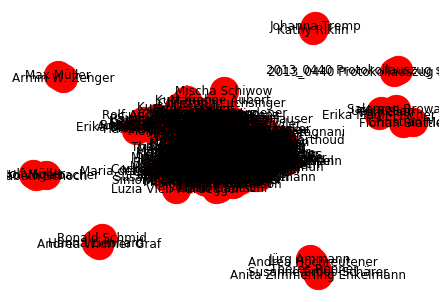

In [26]:
nx.draw(Netz2, node_size=800, node_color='red', with_labels=True)

In [25]:
print(nx.info(Netz2))

Name: 
Type: Graph
Number of nodes: 339
Number of edges: 636
Average degree:   3.7522
